<a href="https://colab.research.google.com/github/hongwon2/Python-Practice/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')

In [2]:
from google.colab import files
titanic.to_csv('titanic.csv')

In [3]:
files.download('titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#결측치 제거

In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [6]:
titanic['age'].isnull().sum()

0

In [7]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [8]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [9]:
titanic['deck'] = titanic['deck'].fillna('C')

In [10]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

#데이터 정보 탐색

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

#시각화

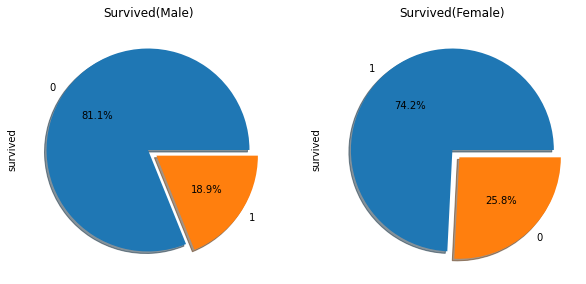

In [13]:
#남자 승객과 여자 승객의 생존율을 pie 차트로 그리기
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,2,figsize = (10,5))
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1],autopct = '%1.1f%%', ax = ax[0],shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1],autopct = '%1.1f%%', ax = ax[1],shadow = True)
ax[0].set_title('Survived(Male)')
ax[1].set_title('Survived(Female)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


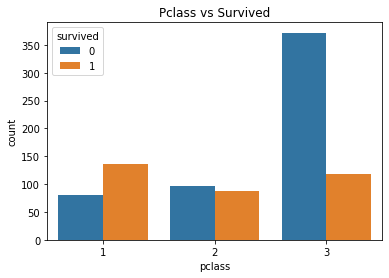

In [14]:
#등급별 생존자 수를 차트로 나타내기
sns.countplot('pclass',hue = 'survived',data = titanic)
plt.title('Pclass vs Survived')
plt.show()

#데이터 모델링

In [15]:
#상관계수 확인하기
titanic_corr = titanic.corr(method = 'pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [16]:
titanic_corr.to_csv('C:\\Users\\hongwon\\Desktop\\학교\\4-1\\유통과판매데이터분석\\titanic_corr.csv',index = False)
titanic_corr.to_csv('titanic_corr.csv')
files.download('titanic_corr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
#특정 변수 사이의 상관 계수 구하기
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053257

In [18]:
titanic['survived'].corr(titanic['fare'])

0.2573065223849625

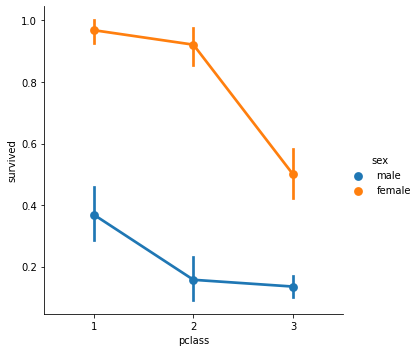

In [19]:
#상관관계 시각화
sns.catplot(x = 'pclass',y = 'survived',hue = 'sex',data = titanic,kind = 'point')
plt.show()

In [20]:
def category_age(x): #10살 단위로 0~7의 값을 바꿔주는 category_age 함수
  if  x < 10:
      return 0
  elif x < 20:
      return 1
  elif x < 30:
      return 2
  elif x < 40:
      return 3
  elif x < 50:
      return 4
  elif x < 60:
      return 5
  elif x < 70:
      return 6
  else:
      return 7

In [21]:
titanic['age2'] = titanic['age'].apply(category_age)

In [22]:
titanic['sex'] = titanic['sex'].map({'male':1,'female':0})#성별을 1/0으로 치환

In [23]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1 #가족의 수를 구하여 family 열 추가

In [24]:
titanic.to_csv('C:\\Users\\hongwon\\Desktop\\학교\\4-1\\유통과판매데이터분석\\titanic_corr.csv',index = False)

In [25]:
heatmap_data = titanic[['survived','sex','age2','family','pclass','fare']]

In [26]:
colormap = plt.cm.RdBu

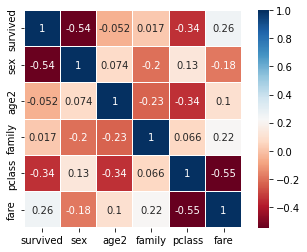

In [27]:
sns.heatmap(heatmap_data.astype(float).corr(),linewidths = 0.1,vmax = 1.0,square = True,cmap = colormap,linecolor = 'white',annot = True,annot_kws = {'size':10})
plt.show()